In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense
from tensorflow.keras.datasets import fashion_mnist

In [ ]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
train_images = train_images.astype('float32')/255
test_images = test_images.astype('float32')/255

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
encoder_input = tf.keras.Input(shape=(28, 28, 1), name='original_img')
x = layers.Conv2D(16, 3, activation='relu')(encoder_input)
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(3)(x)
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.Conv2D(16, 3, activation='relu')(x)
encoder_output = layers.GlobalMaxPooling2D()(x)

encoder = tf.keras.Model(encoder_input, encoder_output, name='encoder')
encoder.summary()

Model: "encoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 original_img (InputLayer)   [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 16)        160       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        4640      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 8, 8, 32)         0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 6, 6, 32)          9248      
                                                                 
 conv2d_3 (Conv2D)           (None, 4, 4, 16)          4624      
                                                           

In [ ]:
decoder_input = tf.keras.Input(shape=(16,), name='encoded_img')
x = layers.Reshape((4, 4, 1))(decoder_input)
x = layers.Conv2DTranspose(16, 3, activation='relu')(x)
x = layers.Conv2DTranspose(32, 3, activation='relu')(x)
x = layers.UpSampling2D(3)(x)
x = layers.Conv2DTranspose(16, 3, activation='relu')(x)
decoder_output = layers.Conv2DTranspose(1, 3, activation='relu')(x)
decoder = tf.keras.Model(decoder_input, decoder_output, name='decoder')
decoder.summary()

Model: "decoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 encoded_img (InputLayer)    [(None, 16)]              0         
                                                                 
 reshape (Reshape)           (None, 4, 4, 1)           0         
                                                                 
 conv2d_transpose (Conv2DTra  (None, 6, 6, 16)         160       
 nspose)                                                         
                                                                 
 conv2d_transpose_1 (Conv2DT  (None, 8, 8, 32)         4640      
 ranspose)                                                       
                                                                 
 up_sampling2d (UpSampling2D  (None, 24, 24, 32)       0         
 )                                                               
                                                           

In [ ]:
autoencoder_input = tf.keras.Input(shape=(28, 28, 1), name='img')
encoded_img = encoder(autoencoder_input)
decoded_img = decoder(encoded_img)
autoencoder = tf.keras.Model(autoencoder_input, decoded_img,
name='autoencoder')
autoencoder.summary()
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.fit(train_images, train_images, epochs=5, batch_size=128,
shuffle=True, validation_data=(test_images, test_images))

Model: "autoencoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 img (InputLayer)            [(None, 28, 28, 1)]       0         
                                                                 
 encoder (Functional)        (None, 16)                18672     
                                                                 
 decoder (Functional)        (None, 28, 28, 1)         9569      
                                                                 
Total params: 28,241
Trainable params: 28,241
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
469/469 [==============================] - 122s 255ms/step - loss: 0.0503 - val_loss: 0.0314
Epoch 2/5
469/469 [==============================] - 119s 253ms/step - loss: 0.0288 - val_loss: 0.0268
Epoch 3/5
469/469 [==============================] - 119s 254ms/step - loss: 0.0259 - val_loss: 0.0252
Epoch 

and the actual image looks like
1/1 [==============================] - 0s 246ms/step


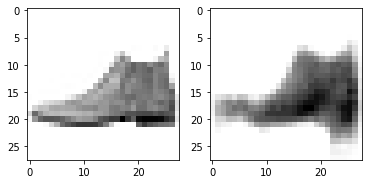

In [ ]:
print("and the actual image looks like")
img_out = autoencoder.predict(test_images[0].reshape(1,28,28,1))
f, axarr = plt.subplots(1,2)
axarr[0].imshow(test_images[0].reshape(28,28), cmap = 'Greys')
axarr[1].imshow(img_out[0].reshape(28,28), cmap = 'Greys')
plt.show()

Exercise
● Try to add noise to the test images and see if
the autoencoder can denoise them.
● Train an auto encoder to denoise images.

1/1 [==============================] - 0s 56ms/step


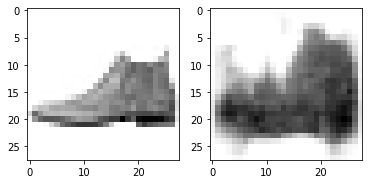

In [ ]:
# Denoising the test set :
import numpy as np
n = test_images.shape [0]
n_rows = test_images.shape [1]
n_cols = test_images.shape [2]
mean = 0.1
stddev = 0.05
noise = np.random.normal(mean, stddev, (n, n_rows, n_cols))
test_images_noisy = test_images + noise
img_out = autoencoder.predict(test_images_noisy [0].reshape(1,28,28,1))
f, axarr = plt.subplots(1,2)
axarr[0].imshow(test_images[0].reshape(28,28), cmap='Greys')
axarr[1].imshow(img_out.reshape(28,28), cmap='Greys')
plt.show()

In [ ]:
#Training to denoise :
import numpy as np
n = train_images.shape [0]
n_rows = train_images.shape [1]
n_cols = train_images.shape [2]
mean = 0.1
stddev = 0.05
noise = np.random.normal(mean, stddev, (n, n_rows, n_cols))
train_images_noisy = train_images + noise
autoencoder_input = tf.keras.Input(shape=(28, 28, 1), name='img')
encoded_img = encoder(autoencoder_input)
decoded_img = decoder(encoded_img)
autoencoder = tf.keras.Model(autoencoder_input, decoded_img, name='autoencoder')
autoencoder.summary()
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.fit(train_images_noisy, train_images, epochs=5, batch_size=128, shuffle=True, validation_data=(test_images, test_images))

Model: "autoencoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 img (InputLayer)            [(None, 28, 28, 1)]       0         
                                                                 
 encoder (Functional)        (None, 16)                18672     
                                                                 
 decoder (Functional)        (None, 28, 28, 1)         9569      
                                                                 
Total params: 28,241
Trainable params: 28,241
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
469/469 [==============================] - 139s 292ms/step - loss: 0.0243 - val_loss: 0.0375
Epoch 2/5
469/469 [==============================] - 128s 273ms/step - loss: 0.0229 - val_loss: 0.0360
Epoch 3/5
469/469 [==============================] - 125s 266ms/step - loss: 0.0226 - val_loss: 0.0362
Epoch 

1/1 [==============================] - 0s 23ms/step


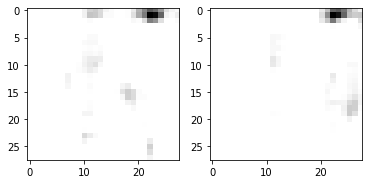

In [ ]:
#Generating images :
mean = 0.5
stddev = 0.3
noise1 = np.random.normal(mean, stddev, (16,))
noise2 = np.random.normal(mean, stddev, (16,))
img_out1 = decoder.predict(noise1.reshape(1,16))
img_out2 = decoder.predict(noise2.reshape(1,16))
f, axarr = plt.subplots(1,2)
axarr[0].imshow(img_out1.reshape(28,28), cmap='Greys')
axarr[1].imshow(img_out2.reshape(28,28), cmap='Greys')
plt.show()

# Variational Autoencoders

In [ ]:
#Encoder:
from tensorflow import keras
from tensorflow.keras import layers
latent_dim = 2
encoder_inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(32, 3, activation="relu", strides=2, padding="same")(encoder_inputs)
x = layers.Conv2D(64, 3, activation="relu", strides=2, padding="same")(x)
x = layers.Flatten()(x)
x = layers.Dense(16, activation="relu")(x)
z_mean = layers.Dense(latent_dim, name="z_mean")(x)
z_log_var = layers.Dense(latent_dim, name="z_log_var")(x)
encoder = keras.Model(encoder_inputs, [z_mean, z_log_var], name="encoder")

In [ ]:
# Latent space sampling layer:
import tensorflow as tf
class Sampler(layers.Layer):
  def call(self, z_mean, z_log_var):
    batch_size = tf.shape(z_mean)[0]
    z_size = tf.shape(z_mean)[1]
    epsilon = tf.random.normal(shape=(batch_size, z_size))
    return z_mean + tf.exp(0.5 * z_log_var) * epsilon

In [ ]:
# Decoder:
latent_inputs = keras.Input(shape=(latent_dim,))
x = layers.Dense(7 * 7 * 64, activation="relu")(latent_inputs)
x = layers.Reshape((7, 7, 64))(x)
x = layers.Conv2DTranspose(64, 3, activation="relu", strides=2, padding="same")(x)
x = layers.Conv2DTranspose(32, 3, activation="relu", strides=2, padding="same")(x)
decoder_outputs = layers.Conv2D(1, 3, activation="sigmoid", padding="same")(x)
decoder = keras.Model(latent_inputs, decoder_outputs, name="decoder")

In [ ]:
# VAE model with custom train_step():
class VAE(keras.Model):
  def __init__(self, encoder, decoder, **kwargs):
    super().__init__(**kwargs)
    self.encoder = encoder
    self.decoder = decoder
    self.sampler = Sampler()
    self.total_loss_tracker = keras.metrics.Mean(name="total_loss")
    self.reconstruction_loss_tracker = keras.metrics.Mean(name="reconstruction_loss")
    self.kl_loss_tracker = keras.metrics.Mean(name="kl_loss")
  
  @property
  def metrics(self):
    return [self.total_loss_tracker, self.reconstruction_loss_tracker, self.kl_loss_tracker]

  def train_step(self, data):
      with tf.GradientTape() as tape:
        z_mean, z_log_var = self.encoder(data)
        z = self.sampler(z_mean, z_log_var)
        reconstruction = decoder(z)
        reconstruction_loss = tf.reduce_mean(tf.reduce_sum(keras.losses.binary_crossentropy(data, reconstruction),axis=(1, 2)))
        kl_loss = -0.5 * (1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var)) # Regularization: Kullback-Leibler divergence
        total_loss = reconstruction_loss + tf.reduce_mean(kl_loss)
        grads = tape.gradient(total_loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
        self.total_loss_tracker.update_state(total_loss)
        self.reconstruction_loss_tracker.update_state(reconstruction_loss)
        self.kl_loss_tracker.update_state(kl_loss)
      return {"total_loss": self.total_loss_tracker.result(),"reconstruction_loss": self.reconstruction_loss_tracker.result(),"kl_loss": self.kl_loss_tracker.result(),}

In [ ]:
#Training the VAE 1h15:
import numpy as np
(x_train, _), (x_test, _) = keras.datasets.fashion_mnist.load_data()
X = np.concatenate([x_train, x_test], axis=0)
X = np.expand_dims(X, -1).astype("float32") / 255
vae = VAE(encoder, decoder)
vae.compile(optimizer=keras.optimizers.Adam(), run_eagerly=True)
vae.fit(X, epochs=2, batch_size=128) #30 epochs by default

Epoch 1/2
547/547 [==============================] - 259s 473ms/step - total_loss: 283.8943 - reconstruction_loss: 279.8682 - kl_loss: 4.0265
Epoch 2/2
547/547 [==============================] - 242s 443ms/step - total_loss: 269.8199 - reconstruction_loss: 266.2000 - kl_loss: 3.6198


1/1 [==============================] - 0s 44ms/step


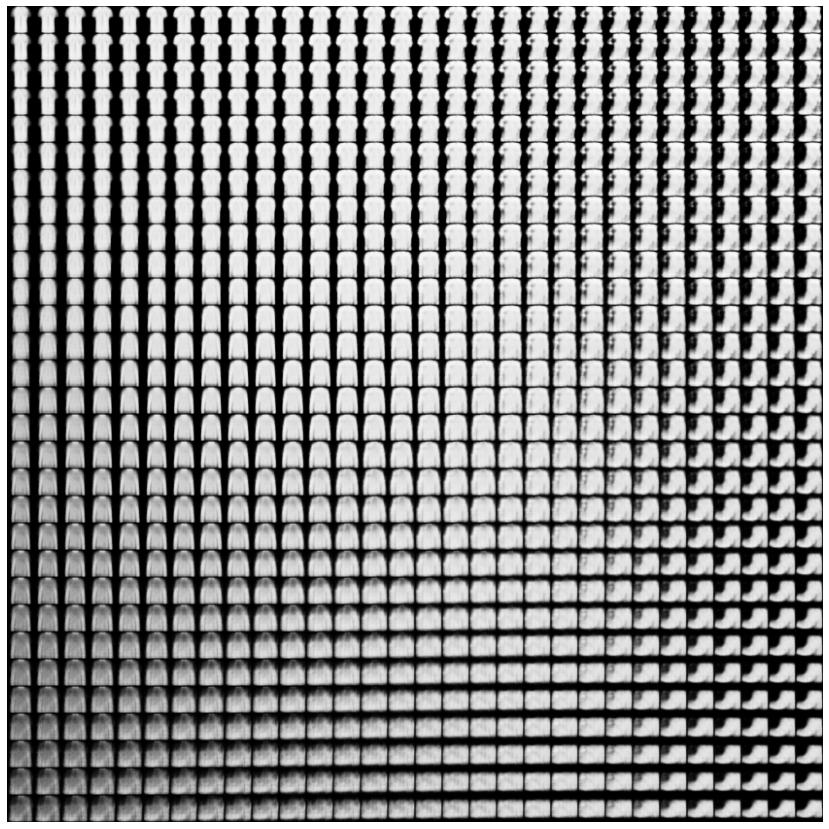

In [ ]:
#Sampling a grid of images from the 2D latent space:
import matplotlib.pyplot as plt
n = 30
digit_size = 28
figure = np.zeros((digit_size * n, digit_size * n))
grid_x = np.linspace(-1, 1, n)
grid_y = np.linspace(-1, 1, n)[::-1]
for i, yi in enumerate(grid_y):
  for j, xi in enumerate(grid_x):
    z_sample = np.array([[xi, yi]])
    x_decoded = vae.decoder.predict(z_sample, verbose = 0)
    digit = x_decoded[0].reshape(digit_size, digit_size)
    figure[i * digit_size : (i + 1) * digit_size, j * digit_size : (j + 1) * digit_size,] = digit
plt.figure(figsize=(15, 15))
start_range = digit_size // 2
end_range = n * digit_size + start_range
pixel_range = np.arange(start_range, end_range, digit_size)
sample_range_x = np.round(grid_x, 1)
sample_range_y = np.round(grid_y, 1)
plt.xticks(pixel_range, sample_range_x)
plt.yticks(pixel_range, sample_range_y)
plt.xlabel("z[0]")
plt.ylabel("z[1]")
plt.axis("off")
plt.imshow(figure, cmap="Greys_r")

# Ensemble

In [ ]:
#As you can see, model can be nested: a model can contain submodels (since a model is just like a layer).
#A common use case for model nesting is ensembling. As an example, here's how to ensemble a set of models into a single model that averages their predictions:
def get_model(): #model feedback, with dense layers
  inputs = keras.Input(shape=(128,))
  outputs = layers.Dense(1, activation='sigmoid')(inputs)
  return keras.Model(inputs, outputs)
  model1 = get_model()
  model2 = get_model()
  model3 = get_model()
  inputs = keras.Input(shape=(128,))
  y1 = model1(inputs)
  y2 = model2(inputs)
  y3 = model3(inputs)
  outputs = layers.average([y1, y2, y3])
  ensemble_model = keras.Model(inputs=inputs, outputs=outputs)

# Multiple Inputs and Outputs
Models with multiple inputs and outputs, The functional API makes it easy to manipulate multiple inputs and outputs. This cannot be handled with the Sequential API.
● Let's say you're building a system for ranking custom issue tickets by priority and routing them to the right department.
● Your model will have 3 inputs:
Title of the ticket (text input)
Text body of the ticket (text input)
Any tags added by the user (categorical input)
● It will have two outputs:
Priority score between 0 and 1 (scalar sigmoid output)
The department that should handle the ticket (softmax output over the set of departments)

In [ ]:
#Let's built this model in a few lines with the Functional API:
num_tags = 12 # Number of unique issue tags
num_words = 10000 # Size of vocabulary obtained when preprocessing text data
num_departments = 4 # Number of departments for predictions
#tensors - model with 3 inputs and 2 outputs
title_input = keras.Input(shape=(None,), name='title') # Variable-length sequence of ints
body_input = keras.Input(shape=(None,), name='body') # Variable-length sequence of ints
tags_input = keras.Input(shape=(num_tags,), name='tags') # Binary vectors of size `num_tags`
# Embed each word in the title into a 64-dimensional vector
title_features = layers.Embedding(num_words, 64)(title_input)
# Embed each word in the text into a 64-dimensional vector
body_features = layers.Embedding(num_words, 64)(body_input)

In [ ]:
# Reduce sequence of embedded words in the title into a single 128-dimensional vector
title_features = layers.LSTM(128)(title_features)
# Reduce sequence of embedded words in the body into a single 32-dimensional vector
body_features = layers.LSTM(32)(body_features)
# Merge all available features into a single large vector via concatenation
x = layers.concatenate([title_features, body_features, tags_input])
# Stick a logistic regression for priority prediction on top of the features
priority_pred = layers.Dense(1, activation='sigmoid', name='priority')(x)
# Stick a department classifier on top of the features
department_pred = layers.Dense(num_departments, activation='softmax', name='department')(x)
# Instantiate an end-to-end model predicting both priority and department
model = keras.Model(inputs=[title_input, body_input, tags_input], #concatenation in one unique tensor
outputs=[priority_pred, department_pred])

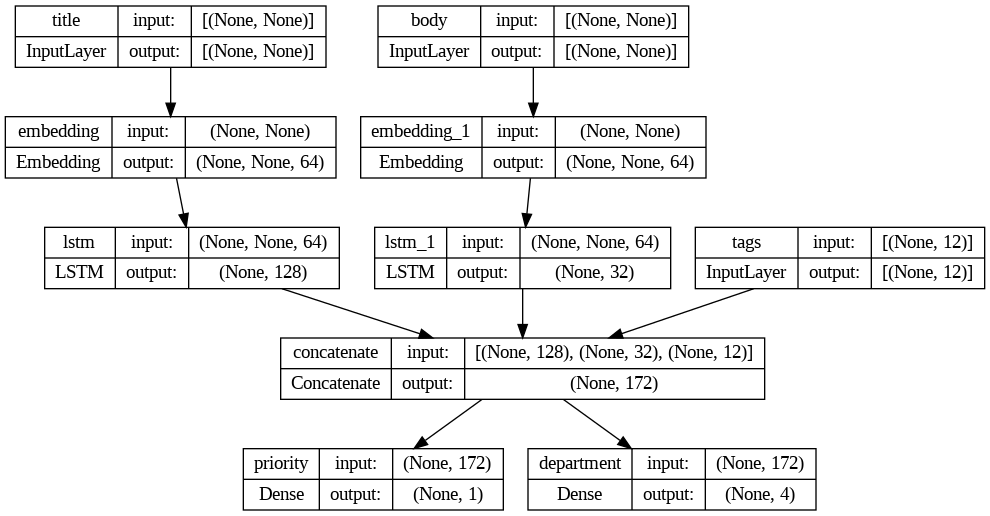

In [ ]:
keras.utils.plot_model(model, 'multi_input_and_output_model.png', show_shapes=True)

In [ ]:
# When compiling this model, we can assign different losses to each output, 
# You can even assign different weights to each loss, to modulate their contribution to the total training loss.
model.compile(optimizer=keras.optimizers.RMSprop(1e-3),
loss=['binary_crossentropy', 'categorical_crossentropy'],
loss_weights=[1., 0.2]) # * the loss to calculate the gradient afterwards

In [ ]:
# Since we gave names to our output layers, we could also specify the loss like this (dict):
model.compile(optimizer=keras.optimizers.RMSprop(1e-3),
loss={'priority': 'binary_crossentropy',
'department': 'categorical_crossentropy'},
loss_weights=[1., 0.2])

In [ ]:
#We can train the model by passing lists of Numpy arrays of inputs and targets:
import numpy as np
# Dummy input data
title_data = np.random.randint(num_words, size=(1280, 10))
body_data = np.random.randint(num_words, size=(1280, 100))
tags_data = np.random.randint(2, size=(1280, num_tags)).astype('float32')
# Dummy target data
priority_targets = np.random.random(size=(1280, 1))
dept_targets = np.random.randint(2, size=(1280, num_departments))
model.fit({'title': title_data, 'body': body_data, 'tags': tags_data},
{'priority': priority_targets, 'department': dept_targets},
epochs=2,
batch_size=32)

Epoch 1/2
40/40 [==============================] - 6s 62ms/step - loss: 1.3208 - priority_loss: 0.6973 - department_loss: 3.1171
Epoch 2/2
40/40 [==============================] - 4s 106ms/step - loss: 1.4303 - priority_loss: 0.6965 - department_loss: 3.6689


# Project GO prerequisite

In [ ]:
# Generating random data / tensor 4D to apply convo :
N = 10000
planes = 31 #convolution plans with 0 or 1 == black or white
moves = 361

input_data = np.random.randint(2, size=(N, 19, 19, planes))
input_data = input_data.astype ('float32')

policy = np.random.randint(moves, size=(N,)) # random values
policy = keras.utils.to_categorical (policy) # to_categorical to transform as a vector : Onehot encoding size 361

value = np.random.randint(2, size=(N,)) # random values 0 ou 1
value = value.astype ('float32')

In [ ]:
# Building the model :
input = keras.Input(shape=(19, 19, planes), name='board')
x = layers.Conv2D(32, 3, activation='relu', padding='same')(input)
x = layers.Conv2D(32, 3, activation='relu', padding='same')(x)
x = layers.Conv2D(32, 3, activation='relu', padding='same')(x)
x = layers.Conv2D(32, 3, activation='relu', padding='same')(x)
x = layers.Conv2D(32, 3, activation='relu', padding='same')(x)
x = layers.Conv2D(32, 3, activation='relu', padding='same')(x)

policy_head = layers.Conv2D(1, 3, activation='relu', padding='same')(x)
policy_head = layers.Flatten()(policy_head)
policy_head = layers.Dense(moves, activation='softmax', name='policy')(policy_head)

value_head = layers.Flatten()(x)
value_head = layers.Dense(1, activation='sigmoid', name='value')(value_head)

model = keras.Model(inputs=input, outputs=[policy_head, value_head])
model.summary ()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 board (InputLayer)             [(None, 19, 19, 31)  0           []                               
                                ]                                                                 
                                                                                                  
 conv2d_7 (Conv2D)              (None, 19, 19, 32)   8960        ['board[0][0]']                  
                                                                                                  
 conv2d_8 (Conv2D)              (None, 19, 19, 32)   9248        ['conv2d_7[0][0]']               
                                                                                                  
 conv2d_9 (Conv2D)              (None, 19, 19, 32)   9248        ['conv2d_8[0][0]']         

In [ ]:
#Training and saving the model :
model.compile(optimizer=keras.optimizers.SGD(lr=0.001), loss={'value': 'mse', 'policy': 'categorical_crossentropy'})

model.fit(input_data, {'policy': policy, 'value': value}, epochs=20, batch_size=128, validation_split=0.1)

model.save ('test.h5')

Epoch 1/20
71/71 [==============================] - 51s 692ms/step - loss: 6.1400 - policy_loss: 5.8896 - value_loss: 0.2504 - val_loss: 6.1388 - val_policy_loss: 5.8884 - val_value_loss: 0.2504
Epoch 2/20
71/71 [==============================] - 54s 765ms/step - loss: 6.1387 - policy_loss: 5.8885 - value_loss: 0.2502 - val_loss: 6.1392 - val_policy_loss: 5.8886 - val_value_loss: 0.2506
Epoch 3/20
71/71 [==============================] - 55s 776ms/step - loss: 6.1383 - policy_loss: 5.8882 - value_loss: 0.2501 - val_loss: 6.1384 - val_policy_loss: 5.8884 - val_value_loss: 0.2499
Epoch 4/20
71/71 [==============================] - 56s 787ms/step - loss: 6.1379 - policy_loss: 5.8878 - value_loss: 0.2501 - val_loss: 6.1388 - val_policy_loss: 5.8886 - val_value_loss: 0.2502
Epoch 5/20
71/71 [==============================] - 70s 988ms/step - loss: 6.1373 - policy_loss: 5.8874 - value_loss: 0.2499 - val_loss: 6.1395 - val_policy_loss: 5.8886 - val_value_loss: 0.2509
Epoch 6/20
71/71 [=======

# Deep Learning Project

In [ ]:
from keras import regularizers

In [ ]:
!wget https://www.lamsade.dauphine.fr/~cazenave/project2022.zip
!unzip project2022.zip

--2023-03-29 08:21:24--  https://www.lamsade.dauphine.fr/~cazenave/project2022.zip
Resolving www.lamsade.dauphine.fr (www.lamsade.dauphine.fr)... 193.48.71.250
Connecting to www.lamsade.dauphine.fr (www.lamsade.dauphine.fr)|193.48.71.250|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 138784129 (132M) [application/zip]
Saving to: ‘project2022.zip’

project2022.zip     100%[===================>] 132.35M  17.9MB/s    in 8.2s    

2023-03-29 08:21:34 (16.1 MB/s) - ‘project2022.zip’ saved [138784129/138784129]

Archive:  project2022.zip
  inflating: Board.h                 
  inflating: Game.h                  
  inflating: Rzone.h                 
  inflating: compile.sh              
  inflating: compileMAC.sh           
  inflating: games.data              
  inflating: golois.cpp              
  inflating: golois.cpython-310-x86_64-linux-gnu.so  
  inflating: golois.cpython-37m-x86_64-linux-gnu.so  
  inflating: golois.cpython-38-x86_64-linux-gnu.so  
  inflat

In [ ]:
!pip install pybind11

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# to compile the library
!c++ -O3 -Wall -shared -std=c++11 -fsized-deallocation -fPIC `python3.9 -m pybind11 --includes` golois.cpp -o golois$(python3.9-config --extension-suffix)

In file included from golois.cpp:17:
Board.h: In member function ‘bool Board::isCapturedLadder(int, int, Rzone*)’:
Board.h:1767:8: warning: unused variable ‘n1’ [-Wunused-variable]
 1767 |    int n1 = nbLiberties (inter, liberties1, stones1, 3);
      |        ^~
Board.h:1788:12: warning: unused variable ‘n1’ [-Wunused-variable]
 1788 |        int n1 = nbLiberties (inter, liberties1, stones1, 3);
      |            ^~
Board.h: In member function ‘void Board::computeLadders(int)’:
Board.h:1819:9: warning: unused variable ‘other’ [-Wunused-variable]
 1819 |     int other = opponent (color);
      |         ^~~~~
Board.h: In member function ‘void Board::computeAllLadders(int, bool)’:
Board.h:2065:9: warning: unused variable ‘n1’ [-Wunused-variable]
 2065 |     int n1 = nbLiberties (i, liberties1, stones1);
      |         ^~
Board.h:2101:7: warning: unused variable ‘n1’ [-Wunused-variable]
 2101 |   int n1 = nbLiberties (i, liberties1, stones1);
      |       ^~
Board.h:2134:9: warning: u

In [ ]:
!python golois.py

2023-03-29 08:28:50.099990: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-03-29 08:28:50.100175: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-03-29 08:28:50.100207: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.
getValidation
r.shape = (10000, 19, 19, 31)
nbExamples = 10000
nbPositionsSGF = 29425326
nbPositionsSGF = 29425

In [ ]:
pip install golois

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement golois (from versions: none)
ERROR: No matching distribution found for golois


In [ ]:
import golois

In [ ]:
!python --version

Python 3.9.16


In [ ]:
#commande shell => !
!c++ -O3 -Wall -shared -std=c++11 -fsized-deallocation -fPIC `python3.7 -m pybind11 --includes` golois.cpp -o golois$(python3.7-config --extension-suffix)

/bin/bash: python3.7: command not found
/bin/bash: python3.7-config: command not found
c++: error: golois.cpp: No such file or directory
c++: fatal error: no input files
compilation terminated.


In [ ]:
#pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import keras
import numpy as np
# slide 273 Project cours
planes = 31
moves = 361
N = 10000
epochs = 20
batch = 128
filters = 32

input_data = np.random.randint(2, size=(N, 19, 19, planes))
input_data = input_data.astype ('float32')

policy = np.random.randint(moves, size=(N,))
policy = keras.utils.to_categorical (policy)

value = np.random.randint(2, size=(N,))
value = value.astype ('float32')

end = np.random.randint(2, size=(N, 19, 19, 2))
end = end.astype ('float32')

groups = np.zeros((N, 19, 19, 1))
groups = groups.astype ('float32')

In [ ]:
input = keras.Input(shape=(19, 19, planes), name='board')
x = layers.Conv2D(filters, 1, activation='relu', padding='same')(input)
for i in range (5):
  x = layers.Conv2D(filters, 3, activation='relu', padding='same')(x)
  policy_head = layers.Conv2D(1, 1, activation='relu', padding='same', use_bias = False, kernel_regularizer=regularizers.l2(0.0001))(x)
  policy_head = layers.Flatten()(policy_head)
  policy_head = layers.Activation('softmax', name='policy')(policy_head)
  value_head = layers.Conv2D(1, 1, activation='relu', padding='same', use_bias = False, kernel_regularizer=regularizers.l2(0.0001))(x)
  value_head = layers.Flatten()(value_head)
  value_head = layers.Dense(50, activation='relu', kernel_regularizer=regularizers.l2(0.0001))(value_head)
  value_head = layers.Dense(1, activation='sigmoid', name='value', kernel_regularizer=regularizers.l2(0.0001))(value_head)
  model = keras.Model(inputs=input, outputs=[policy_head, value_head])

In [ ]:
model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.0005, momentum=0.9),
  loss={'policy': 'categorical_crossentropy', 'value': 'binary_crossentropy'},
  loss_weights={'policy' : 1.0, 'value' : 1.0},
  metrics={'policy': 'categorical_accuracy', 'value': 'mse'})

for i in range (1, epochs + 1):
  print ('epoch ' + str (i))
  golois.getBatch (input_data, policy, value, end, groups, i * N)
  history = model.fit(input_data,
    {'policy': policy, 'value': value},
    epochs=1, batch_size=batch)
  if (i % 5 == 0):
    gc.collect ()
  if (i % 20 == 0):
    golois.getValidation (input_data, policy, value, end)
    val = model.evaluate (input_data, [policy, value], verbose = 0, batch_size=batch)
    print ("val =", val)
    model.save ('test_Labanne.h5')